Downloading the dataset from Kaggle

In [1]:
!pip install kaggle

In [0]:
# Accessing Kaggle Token API to access Public Dataset
import json

token = {"username":"xxxxxxx","key":"--------"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!chmod 600 /root/.kaggle/kaggle.json


In [22]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [46]:
!kaggle datasets list -s puneet6060/intel-image-classification

ref                                    title                        size  lastUpdated          downloadCount  
-------------------------------------  --------------------------  -----  -------------------  -------------  
puneet6060/intel-image-classification  Intel Image Classification  346MB  2019-01-30 09:22:58           9885  


In [47]:
!kaggle datasets download -d puneet6060/intel-image-classification -p /content

100% 345M/346M [00:01<00:00, 187MB/s]
100% 346M/346M [00:01<00:00, 189MB/s]


In [0]:
#!unzip \*.zip


**Intel Image Classification- MultiClass Classification**

This Data contains around 25k images of size 150x150 distributed under 6 categories.

Categories:
1. Buildings
2. Forest
3. Glacier
4. Mountain
5. Sea
6. Street

In [49]:
import tensorflow as tf

In [50]:
pwd

'/content'

In [0]:
# Assigning the structure for the train images:

train_buildings = os.path.join('/content/seg_train/seg_train/buildings')
train_forest = os.path.join('/content/seg_train/seg_train/forest')
train_glacier = os.path.join('/content/seg_train/seg_train/glacier')
train_mountain =os.path.join('/content/seg_train/seg_train/mountain')
train_sea = os.path.join('/content/seg_train/seg_train/sea')
train_street = os.path.join('/content/seg_train/seg_train/street')

In [69]:
print('Total training Buildings detected images:', len(os.listdir(train_buildings)))
print('Total training Forest detected images:', len(os.listdir(train_forest)))
print('Total training Glacier detected images:', len(os.listdir(train_glacier)))
print('Total training Mountain detected images:', len(os.listdir(train_mountain)))
print('Total training Sea detected images:', len(os.listdir(train_sea)))
print('Total training Street detected images:', len(os.listdir(train_street)))

Total training Buildings detected images: 2191
Total training Forest detected images: 2271
Total training Glacier detected images: 2404
Total training Mountain detected images: 2512
Total training Sea detected images: 2274
Total training Street detected images: 2382


*Setting up the Generator Functions for Training and Validation Set*

In [0]:
# Creating Image Generators for Train, Test and Validation Set

from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAIN_DIR = '/content/seg_train/seg_train/' 
VAL_DIR = '/content/seg_pred/seg_pred/'
TEST_DIR = '/content/seg_test/seg_test/'

# Image Augumentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [85]:
# To make Train and Test Data Generators

train_generator = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size=(32,32),
    batch_size = 128,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (32,32),
    batch_size = 128,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


**LeNet-50**

In [0]:
# Model : LeNet-5 (Used ReLu instead of Tanh)

# C1: Convolution Layer with 5x5 Kernel with 6 filters
# A1: Average Pooling with Pooling Size of 2 and stride = 2
# C2: Convolution Layer with 5x5 Kernel with 16 filters
# A2: Average Pooling with Pooling Size of 2 and stride = 2
# C2: 120 filters with 5x5 Filters
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6 , kernel_size= 5 , activation= 'relu', input_shape = (32,32,3) , strides= 1),
    tf.keras.layers.AveragePooling2D(pool_size= (2,2) , strides= 2, padding= 'same'),
    tf.keras.layers.Conv2D(filters= 16, kernel_size= 5, activation= 'relu', strides= 1),
    tf.keras.layers.AveragePooling2D(pool_size= (2,2) , strides= 2),
    tf.keras.layers.Conv2D(filters= 120 , kernel_size= 5 , strides= 1, activation= 'relu'),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(6, activation='softmax')
]
)

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 6)         456       
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_6 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 6)                

In [0]:
# Using RMSProp as Optimizer and Categorical Cross Entropy Loss Function 
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [95]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = test_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 3s 342ms/step - loss: 1.7669 - acc: 0.2314 - val_loss: 1.7273 - val_acc: 0.2461
Epoch 2/100
8/8 [==============================] - 2s 225ms/step - loss: 1.7092 - acc: 0.2637 - val_loss: 1.6271 - val_acc: 0.2959
Epoch 3/100
8/8 [==============================] - 2s 236ms/step - loss: 1.6487 - acc: 0.3135 - val_loss: 1.6694 - val_acc: 0.2861
Epoch 4/100
8/8 [==============================] - 2s 238ms/step - loss: 1.6109 - acc: 0.3408 - val_loss: 1.5040 - val_acc: 0.4463
Epoch 5/100
8/8 [==============================] - 2s 260ms/step - loss: 1.5429 - acc: 0.4033 - val_loss: 1.5835 - val_acc: 0.3320
Epoch 6/100
8/8 [==============================] - 2s 233ms/step - loss: 1.5599 - acc: 0.4062 - val_loss: 1.4301 - val_acc: 0.4580
Epoch 7/100
8/8 [==============================] - 2s 222ms/step - loss: 1.4618 - acc: 0.4540 - val_loss: 1.6689 - val_acc: 0.3184
Epoch 8/100
8/8 [==============================] - 2s 226ms/step - loss: 1.4785 - a

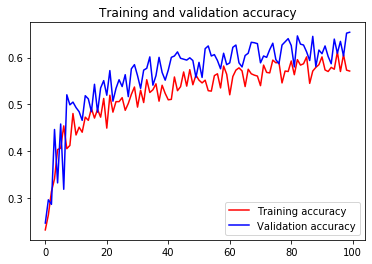

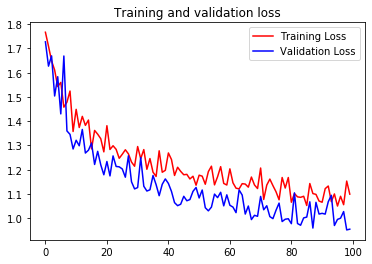

In [96]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()